## Key Requirements for the iRF scikit-learn implementation

* The following is a documentation of the main requirements for the iRF implementation

## Typical Setup


### Import the required dependencies

* In particular `irf_utils` and `irf_jupyter_utils`

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
import numpy as np
from functools import reduce

# Needed for the scikit-learn wrapper function
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from math import ceil

# Import our custom utilities
from imp import reload
from utils import irf_jupyter_utils
from utils import irf_utils
reload(irf_jupyter_utils)
reload(irf_utils)

<module 'utils.irf_utils' from '/Users/shamindras/PERSONAL/LEARNING/REPOS/scikit-learn-sandbox/jupyter/utils/irf_utils.py'>

## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [123]:
load_breast_cancer = load_breast_cancer()

In [128]:
X_train, X_test, y_train, y_test, rf = irf_jupyter_utils.generate_rf_example(n_estimators=10, 
                                                                             feature_weight=None)

## Check out the data

In [129]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 5 rows of the training set features", X_train[:2], sep = ":\n")
print("\n")
print("first 5 rows of the training set outcomes", y_train[:2], sep = ":\n")

Training feature dimensions:
(512, 30)


Training outcome dimensions:
(512,)


Test feature dimensions:
(57, 30)


Test outcome dimensions:
(57,)


first 5 rows of the training set features:
[[  1.98900000e+01   2.02600000e+01   1.30500000e+02   1.21400000e+03
    1.03700000e-01   1.31000000e-01   1.41100000e-01   9.43100000e-02
    1.80200000e-01   6.18800000e-02   5.07900000e-01   8.73700000e-01
    3.65400000e+00   5.97000000e+01   5.08900000e-03   2.30300000e-02
    3.05200000e-02   1.17800000e-02   1.05700000e-02   3.39100000e-03
    2.37300000e+01   2.52300000e+01   1.60500000e+02   1.64600000e+03
    1.41700000e-01   3.30900000e-01   4.18500000e-01   1.61300000e-01
    2.54900000e-01   9.13600000e-02]
 [  2.01800000e+01   1.95400000e+01   1.33800000e+02   1.25000000e+03
    1.13300000e-01   1.48900000e-01   2.13300000e-01   1.25900000e-01
    1.72400000e-01   6.05300000e-02   4.33100000e-01   1.00100000e+00
    3.00800000e+00   5.24900000e+01   9.08700000e-03   2.71500000e-02
  

## Step 2: Get all Random Forest and Decision Tree Data

* Extract in a single dictionary the random forest data and for all of it's decision trees
* This is as required for RIT purposes

In [130]:
all_rf_tree_data = irf_utils.get_rf_tree_data(rf=rf,
                                              X_train=X_train, y_train=y_train, 
                                              X_test=X_test, y_test=y_test)

In [131]:
#all_rf_tree_data
rf.feature_importances_

array([ 0.01532421,  0.00821112,  0.00513563,  0.0097055 ,  0.00710237,
        0.0029504 ,  0.0680284 ,  0.08854166,  0.00158481,  0.00529412,
        0.00466507,  0.00136981,  0.00384776,  0.01382308,  0.00244041,
        0.00357605,  0.00177791,  0.00429194,  0.00185412,  0.00399605,
        0.29426993,  0.0037426 ,  0.09527497,  0.24616308,  0.02024462,
        0.00611476,  0.0340067 ,  0.02463131,  0.01523071,  0.00680092])

## STEP 3: Get the RIT data and produce RITs

In [132]:
all_rit_tree_data = irf_utils.get_rit_tree_data(
    all_rf_tree_data=all_rf_tree_data,
    bin_class_type=1,
    random_state=12,
    M=100,
    max_depth=2,
    noisy_split=False,
    num_splits=2)

In [133]:
#for i in range(100):
#    print(all_rit_tree_data['rit{}'.format(i)]['rit_leaf_node_union_value'])

# Perform Manual CHECKS on the `irf_utils`
* These should be converted to unit tests and checked with `nosetests -v test_irf_utils.py`

# Step 4: Plot some Data

### List Ranked Feature Importances

In [134]:
# Print the feature ranking
print("Feature ranking:")

feature_importances_rank_idx = all_rf_tree_data['feature_importances_rank_idx']
feature_importances = all_rf_tree_data['feature_importances']

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))

Feature ranking:
1. feature 20 (0.294270)
2. feature 23 (0.246163)
3. feature 22 (0.095275)
4. feature 7 (0.088542)
5. feature 6 (0.068028)
6. feature 26 (0.034007)
7. feature 27 (0.024631)
8. feature 24 (0.020245)
9. feature 0 (0.015324)
10. feature 28 (0.015231)
11. feature 13 (0.013823)
12. feature 3 (0.009706)
13. feature 1 (0.008211)
14. feature 4 (0.007102)
15. feature 29 (0.006801)
16. feature 25 (0.006115)
17. feature 9 (0.005294)
18. feature 2 (0.005136)
19. feature 10 (0.004665)
20. feature 17 (0.004292)
21. feature 19 (0.003996)
22. feature 12 (0.003848)
23. feature 21 (0.003743)
24. feature 15 (0.003576)
25. feature 5 (0.002950)
26. feature 14 (0.002440)
27. feature 18 (0.001854)
28. feature 16 (0.001778)
29. feature 8 (0.001585)
30. feature 11 (0.001370)


### Plot Ranked Feature Importances

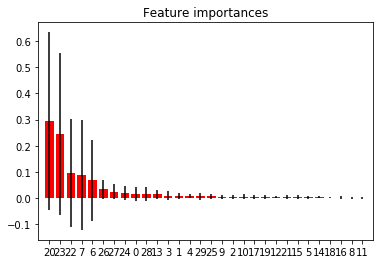

In [135]:
# Plot the feature importances of the forest
feature_importances_std = all_rf_tree_data['feature_importances_std']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Decision Tree 0 (First) - Get output

### Check the output against the decision tree graph

In [136]:
# Now plot the trees individually
#irf_jupyter_utils.draw_tree(decision_tree = all_rf_tree_data['rf_obj'].estimators_[0])

## Compare to our dict of extracted data from the tree

In [137]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0'])

In [138]:
# Count the number of samples passing through the leaf nodes
sum(all_rf_tree_data['dtree0']['tot_leaf_node_values'])

512

### Check output against the diagram

In [139]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0']['all_leaf_paths_features'])

# Wrapper function for iRF

In [142]:
def run_RIT(X_train,
            X_test,
            y_train,
            y_test,
            K,
            n_estimators,
            B,
            random_state_classifier=2018,
            propn_n_samples=0.2,
            bin_class_type=1,
            random_state=12,
            M=4,
            max_depth=2,
            noisy_split=False,
            num_splits=2):
    """ This function will allow us to run the RIT
        for the given parameters
    """

    # Set the random state for reproducibility
    np.random.seed(random_state_classifier)

    # Convert the bootstrap resampling proportion to the number
    # of rows to resample from the training data
    n_samples = ceil(propn_n_samples * X_train.shape[0])

    # Initialize dictionary of rf weights
    # CHECK: change this name to be `all_rf_weights_output`
    all_rf_weights = {}

    # Initialize dictionary of bootstrap rf output
    all_rf_bootstrap_output = {}

    # Initialize dictionary of bootstrap RIT output
    all_rit_bootstrap_output = {}

    for k in range(K):
        if k == 0:

            # Initially feature weights are None
            feature_importances = None

            # Update the dictionary of all our RF weights
            all_rf_weights["rf_weight{}".format(k)] = feature_importances

            # fit RF feature weights i.e. initially None
            rf = RandomForestClassifier(n_estimators=n_estimators)

            # fit the classifier
            rf.fit(
                X=X_train,
                y=y_train,
                feature_weight=all_rf_weights["rf_weight{}".format(k)])

            # Update feature weights using the
            # new feature importance score
            feature_importances = rf.feature_importances_

            # Load the weights for the next iteration
            all_rf_weights["rf_weight{}".format(k + 1)] = feature_importances

        else:
            # fit weighted RF
            # Use the weights from the previous iteration
            rf = RandomForestClassifier(n_estimators=n_estimators)

            # fit the classifier
            rf.fit(
                X=X_train,
                y=y_train,
                feature_weight=all_rf_weights["rf_weight{}".format(k)])

            # Update feature weights using the
            # new feature importance score
            feature_importances = rf.feature_importances_

            # Load the weights for the next iteration
            all_rf_weights["rf_weight{}".format(k + 1)] = feature_importances

    # Run the RITs
    for b in range(B):

        # Take a bootstrap sample from the training data
        # based on the specified user proportion
        X_train_rsmpl, y_rsmpl = resample(
            X_train, y_train, n_samples=n_samples)

        # Set up the weighted random forest
        # Using the weight from the (K-1)th iteration i.e. RF(w(K))
        rf_bootstrap = RandomForestClassifier(
            #CHECK: different number of trees to fit for bootstrap samples
            n_estimators=n_estimators)

        # Fit RF(w(K)) on the bootstrapped dataset
        rf_bootstrap.fit(
            X=X_train_rsmpl,
            y=y_rsmpl,
            feature_weight=all_rf_weights["rf_weight{}".format(K - 1)])

        # All RF tree data
        # CHECK: why do we need y_train here?
        all_rf_tree_data = irf_utils.get_rf_tree_data(
            rf=rf_bootstrap,
            X_train=X_train_rsmpl,
            y_train=y_rsmpl,
            X_test=X_test,
            y_test=y_test)

        # Update the rf bootstrap output dictionary
        all_rf_bootstrap_output['rf_bootstrap{}'.format(b)] = all_rf_tree_data

        # Run RIT on the interaction rule set
        # CHECK - each of these variables needs to be passed into
        # the main run_RIT function
        all_rit_tree_data = irf_utils.get_rit_tree_data(
            all_rf_tree_data=all_rf_tree_data,
            bin_class_type=1,
            random_state=12,
            M=4,
            max_depth=2,
            noisy_split=False,
            num_splits=2)

        # Update the rf bootstrap output dictionary
        # We will reference the RIT for a particular rf bootstrap
        # using the specific bootstrap id - consistent with the
        # rf bootstrap output data
        all_rit_bootstrap_output['rf_bootstrap{}'.format(b)] = all_rit_tree_data

    return all_rf_weights, all_rf_bootstrap_output, all_rit_bootstrap_output

In [145]:
all_rf_weights, all_rf_bootstrap_output, all_rit_bootstrap_output =\
run_RIT(X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        K=5,
        n_estimators=20,
        B=3,
        random_state_classifier=2018,
        propn_n_samples=0.2,
        bin_class_type=1,
        random_state=12,
        M=4,
        max_depth=2,
        noisy_split=False,
        num_splits=2)

In [146]:
all_rf_weights

{'rf_weight0': None,
 'rf_weight1': array([ 0.0378531 ,  0.01143301,  0.00917885,  0.0389645 ,  0.00570286,
         0.00355542,  0.04189169,  0.04736217,  0.00276282,  0.00375928,
         0.00758323,  0.00132309,  0.00668335,  0.00753545,  0.0027825 ,
         0.0043194 ,  0.00388132,  0.00557761,  0.00168787,  0.00332904,
         0.26950483,  0.01216281,  0.12508337,  0.16629184,  0.01540501,
         0.00929946,  0.03860752,  0.0959075 ,  0.01366094,  0.00691016]),
 'rf_weight2': array([  7.26517745e-03,   4.32093818e-03,   1.36507678e-03,
          6.99189581e-03,   1.15739252e-03,   0.00000000e+00,
          6.06437379e-02,   5.79695497e-02,   1.25157366e-05,
          1.08404196e-03,   9.05942976e-04,   0.00000000e+00,
          1.15215497e-03,   9.20164673e-04,   3.86415094e-04,
          0.00000000e+00,   2.11095719e-04,   1.14359123e-03,
          3.30663911e-04,   0.00000000e+00,   1.80323883e-01,
          1.46776388e-02,   3.12348154e-01,   1.72344511e-01,
          3.956

## Run the iRF Function
* For bootstrap - just pick up 20% of the training dataset at a time

In [147]:
all_rf_weights, all_rf_bootstrap_output, all_rit_bootstrap_output = run_RIT(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    K=5,
    n_estimators=20,
    B=3,
    random_state_classifier=2018,
    propn_n_samples=0.2)

In [148]:
all_rit_bootstrap_output

{'rf_bootstrap0': {'rit0': {'rit': <utils.irf_utils.RITTree at 0x118551a58>,
   'rit_intersected_values': [array([20]),
    array([], dtype=int64),
    array([], dtype=int64)],
   'rit_leaf_node_union_value': array([], dtype=int64),
   'rit_leaf_node_values': [array([], dtype=int64), array([], dtype=int64)]},
  'rit1': {'rit': <utils.irf_utils.RITTree at 0x1186ac7b8>,
   'rit_intersected_values': [array([22]), array([22]), array([22])],
   'rit_leaf_node_union_value': array([22]),
   'rit_leaf_node_values': [array([22]), array([22])]},
  'rit2': {'rit': <utils.irf_utils.RITTree at 0x11843b4e0>,
   'rit_intersected_values': [array([22, 27]),
    array([22, 27]),
    array([22, 27])],
   'rit_leaf_node_union_value': array([22, 27]),
   'rit_leaf_node_values': [array([22, 27]), array([22, 27])]},
  'rit3': {'rit': <utils.irf_utils.RITTree at 0x11843b048>,
   'rit_intersected_values': [array([22, 27]), array([22]), array([22])],
   'rit_leaf_node_union_value': array([22]),
   'rit_leaf_nod

## Run iRF for just 1 iteration - should be the uniform sampling version

In [105]:
all_rf_weights, all_rf_bootstrap_output, all_rit_bootstrap_output = run_RIT(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    K=1,
    n_estimators=1000,
    B=3,
    random_state_classifier=2018,
    propn_n_samples=0.2)

In [110]:
print(np.ndarray.tolist(all_rf_weights['rf_weight1']))

[0.04633261379762379, 0.01279795043247083, 0.046495241892867786, 0.05372706923643147, 0.006138991861632713, 0.014100213060596797, 0.04617194091253494, 0.08346154565331251, 0.0036537799706262354, 0.003791907583644991, 0.01370513953088993, 0.004414082615391185, 0.011028533964541206, 0.037304546357003705, 0.004568189166772427, 0.003972474531753761, 0.005647072380934442, 0.005003046014482413, 0.004411788259421457, 0.004294588056227052, 0.11649582359720746, 0.018277781816583665, 0.14157084694321875, 0.11806594564950779, 0.011959910265573071, 0.015115978057810984, 0.03314477718256596, 0.11802326977428769, 0.009533612292861931, 0.006791339141222792]


## Compare to the original single fitted random forest (top of the notebook)!

In [117]:
rf.feature_importances_

array([ 0.04633261,  0.01279795,  0.04649524,  0.05372707,  0.00613899,
        0.01410021,  0.04617194,  0.08346155,  0.00365378,  0.00379191,
        0.01370514,  0.00441408,  0.01102853,  0.03730455,  0.00456819,
        0.00397247,  0.00564707,  0.00500305,  0.00441179,  0.00429459,
        0.11649582,  0.01827778,  0.14157085,  0.11806595,  0.01195991,
        0.01511598,  0.03314478,  0.11802327,  0.00953361,  0.00679134])

## These look like they match as required!

In [85]:
rf_weight5 = np.ndarray.tolist(all_rf_weights['rf_weight1'])
rf_weight5

[0.10767154275612509,
 0.008992942951689007,
 0.04092015482965616,
 0.020019481117461487,
 0.0038785695302082333,
 0.004614856325783138,
 0.010784306964824384,
 0.04536843559080388,
 0.0045275571975149295,
 0.0061920535902737495,
 0.0080873459928847,
 0.004401331589078887,
 0.028760901538330635,
 0.012116735768488474,
 0.005813822234638069,
 0.0028500566138319667,
 0.0041308997324121886,
 0.0033107153796413736,
 0.0016826521304107674,
 0.0055393766294008365,
 0.1400233067145635,
 0.013621725237979837,
 0.17859298370533438,
 0.059714820595771004,
 0.007240686978087348,
 0.017034180945528336,
 0.09629763959251847,
 0.14084009611056247,
 0.01194765529409918,
 0.005023166362097486]

#

In [48]:
sorted([i for i, e in enumerate(rf_weight10) if e != 0])

[1, 7, 12, 13, 20, 21, 22, 23, 26, 27]

{'rf_weight0': None,
 'rf_weight1': array([ 0.10767154,  0.00899294,  0.04092015,  0.02001948,  0.00387857,
         0.00461486,  0.01078431,  0.04536844,  0.00452756,  0.00619205,
         0.00808735,  0.00440133,  0.0287609 ,  0.01211674,  0.00581382,
         0.00285006,  0.0041309 ,  0.00331072,  0.00168265,  0.00553938,
         0.14002331,  0.01362173,  0.17859298,  0.05971482,  0.00724069,
         0.01703418,  0.09629764,  0.1408401 ,  0.01194766,  0.00502317]),
 'rf_weight2': array([  4.44435012e-02,   3.40469419e-03,   4.96289277e-03,
          3.15592324e-03,   0.00000000e+00,   0.00000000e+00,
          2.34638107e-03,   8.55088015e-02,   0.00000000e+00,
          2.00859319e-03,   1.59775615e-03,   4.19349026e-04,
          7.67580520e-03,   2.78187346e-03,   1.09017353e-04,
          2.72543383e-04,   3.79613998e-04,   0.00000000e+00,
          2.23560029e-03,   1.36390833e-03,   1.44290207e-01,
          6.75257965e-03,   3.71650639e-01,   1.57358155e-01,
          1.615